In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [39]:
import matplotlib as mpl
mpl.style.use('classic')

In [40]:
df = pd.read_csv(r"C:\Users\kyrie\ironhack\project8\cleanproject8.csv")
df

,Unnamed: 0,Dates,Time,Lat,Lon,Base,month,month_name,Day_of_month,Day_name,Day_of_weeks,period,weekend?
0,0,2014-06-01,0,40.7293,-73.9920,B02512,6,June,1,Sunday,6,night,weekend
1,1,2014-06-01,0,40.7131,-74.0097,B02512,6,June,1,Sunday,6,night,weekend
2,2,2014-06-01,0,40.3461,-74.6610,B02512,6,June,1,Sunday,6,night,weekend
3,3,2014-06-01,0,40.7555,-73.9833,B02512,6,June,1,Sunday,6,night,weekend
4,4,2014-06-01,0,40.6880,-74.1831,B02512,6,June,1,Sunday,6,night,weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...
663839,663839,2014-06-30,22,40.7332,-73.9872,B02764,6,June,30,Monday,0,evening,workweek
663840,663840,2014-06-30,23,40.7905,-73.9796,B02764,6,June,30,Monday,0,evening,workweek
663841,663841,2014-06-30,23,40.7640,-73.9887,B02764,6,June,30,Monday,0,evening,workweek
663842,663842,2014-06-30,23,40.7262,-73.9944,B02764,6,June,30,Monday,0,evening,workweek


In [41]:
df = df.drop(['Unnamed: 0'], axis=1)

In [42]:
df

,Dates,Time,Lat,Lon,Base,month,month_name,Day_of_month,Day_name,Day_of_weeks,period,weekend?
0,2014-06-01,0,40.7293,-73.9920,B02512,6,June,1,Sunday,6,night,weekend
1,2014-06-01,0,40.7131,-74.0097,B02512,6,June,1,Sunday,6,night,weekend
2,2014-06-01,0,40.3461,-74.6610,B02512,6,June,1,Sunday,6,night,weekend
3,2014-06-01,0,40.7555,-73.9833,B02512,6,June,1,Sunday,6,night,weekend
4,2014-06-01,0,40.6880,-74.1831,B02512,6,June,1,Sunday,6,night,weekend
...,...,...,...,...,...,...,...,...,...,...,...,...
663839,2014-06-30,22,40.7332,-73.9872,B02764,6,June,30,Monday,0,evening,workweek
663840,2014-06-30,23,40.7905,-73.9796,B02764,6,June,30,Monday,0,evening,workweek
663841,2014-06-30,23,40.7640,-73.9887,B02764,6,June,30,Monday,0,evening,workweek
663842,2014-06-30,23,40.7262,-73.9944,B02764,6,June,30,Monday,0,evening,workweek


In [71]:
df.groupby(['Base'], as_index = False)['Dates'].count()

,Base,Dates
0,B02512,32509
1,B02598,242975
2,B02617,184460
3,B02682,194926
4,B02764,8974


In [78]:
pivot = df.pivot_table(index=["Base"],columns=["period"] , values=["Dates"], aggfunc="count")
pivot

Dates                              
period afternoon evening midday morning  night
Base                                          
B02512      7206    8368   6842    6894   3199
B02598     52610   65564  48239   48086  28476
B02617     40192   51072  36000   35642  21554
B02682     41707   51480  37124   40275  24340
B02764      1912    2414   1979    1745    924

In [60]:
tab = pd.crosstab(df.Base, df.period, margins = True, margins_name='Count').reset_index()
tab

period,Base,afternoon,evening,midday,morning,night,Count
0,B02512,7206,8368,6842,6894,3199,32509
1,B02598,52610,65564,48239,48086,28476,242975
2,B02617,40192,51072,36000,35642,21554,184460
3,B02682,41707,51480,37124,40275,24340,194926
4,B02764,1912,2414,1979,1745,924,8974
5,Count,143627,178898,130184,132642,78493,663844


In [55]:
cross = pd.crosstab([df.Dates, df['weekend?']], df.Day_name)
cross

,Day_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Dates,weekend?,,,,,,,
2014-06-01,weekend,0,0,0,15967,0,0,0
2014-06-02,workweek,0,17503,0,0,0,0,0
2014-06-03,workweek,0,0,0,0,0,22674,0
2014-06-04,workweek,0,0,0,0,0,0,22831
2014-06-05,workweek,0,0,0,0,28371,0,0
2014-06-06,workweek,24683,0,0,0,0,0,0
2014-06-07,weekend,0,0,20889,0,0,0,0
2014-06-08,weekend,0,0,0,15749,0,0,0
2014-06-09,workweek,0,23244,0,0,0,0,0


Text(0.5, 1.0, 'per day of the week')

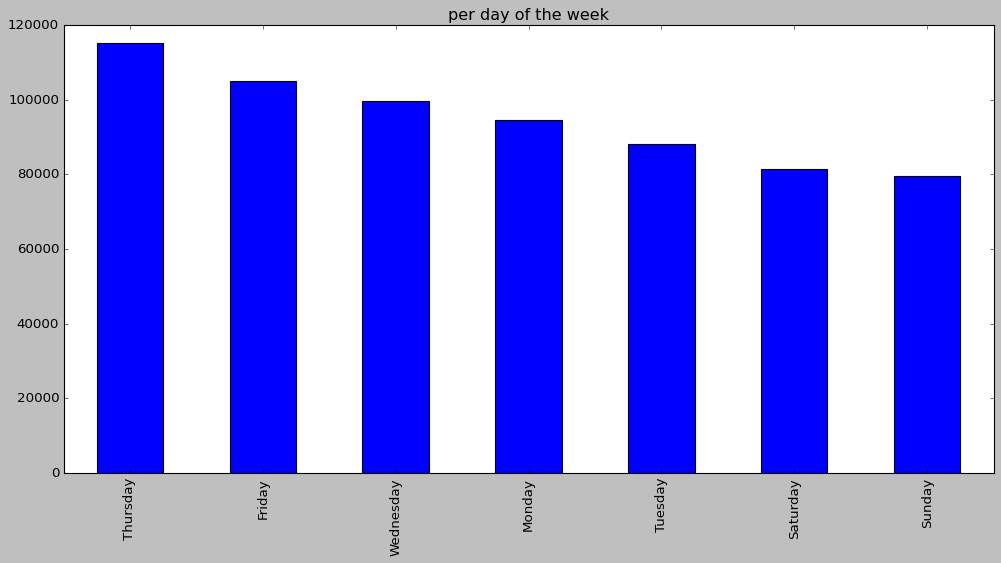

In [43]:
df['Day_name'].value_counts().plot(kind="bar",figsize=(15,7))
plt.title('per day of the week')

<AxesSubplot:xlabel='Day_name', ylabel='Count'>

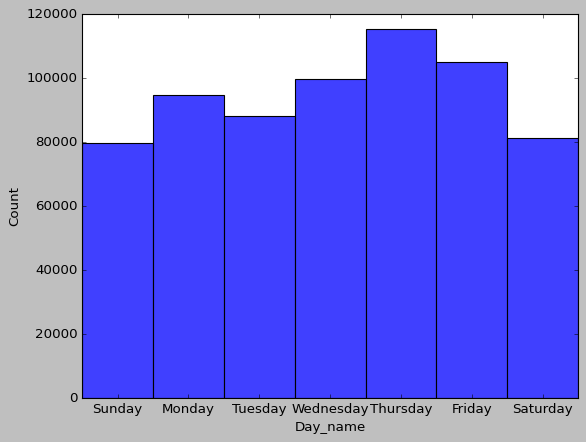

In [53]:
sns.histplot(data=df,x='Day_name')

Text(0.5, 1.0, 'moment of the day')

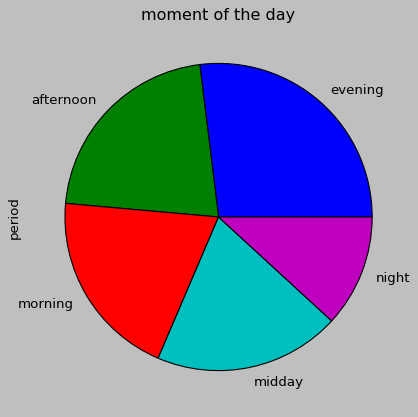

In [46]:
df['period'].value_counts().plot.pie()
plt.title('moment of the day')

Text(0.5, 1.0, 'weekend vs workweek')

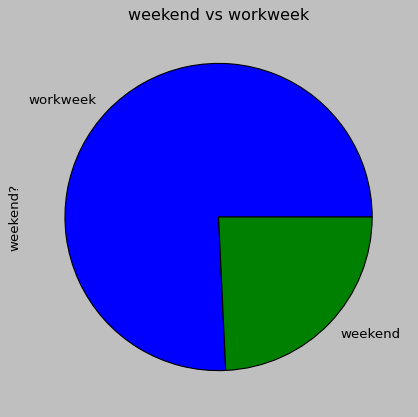

In [47]:
df['weekend?'].value_counts().plot.pie()
plt.title('weekend vs workweek')